In [1]:
import pandas as pd

# Load the CSV
df = pd.read_csv("glassdoor_cleaned_new.csv")



In [2]:
df

,Job Title,Location,Rating,monthly,min_salary_rupees,max_salary_rupees,avg_salary_rupees,company_name_cleaned,Standardized Title
0,Data Scientist,Bhubaneshwar,4.3,0,1000000.0,2300000.0,1650000.0,Nirmalya Labs,Data Scientist
1,Data Analytics Lead Analyst - C13 - BANGALORE,Bengaluru,3.7,0,600000.0,1000000.0,800000.0,Citi,Analyst
2,Business Analyst – Digital Analytics ( Adobe ),Bengaluru,3.7,0,500000.0,1000000.0,750000.0,Citi,Analyst
3,"Sr. Consultant, Data Science and Analytics",Bengaluru,4,0,1000000.0,1000000.0,1000000.0,TransUnion,Data Science
4,Lead Data Analytics Analyst (Vice President),Bengaluru,3.7,0,600000.0,1000000.0,800000.0,Citi,Analyst
...,...,...,...,...,...,...,...,...,...
1200,WSI | Java Developer,Chennai,4.2,0,400000.0,700000.0,550000.0,Photon,Java Developer
1201,Java Springboot Developer,Uttar Pradesh,NaN,0,500000.0,900000.0,700000.0,Nwaresoft,Java Developer
1202,Java,Cochin,2.6,0,300000.0,600000.0,450000.0,Fleming Embedded and Software Solutions,Java Developer
1203,Java Developer,Hyderābād,3.9,0,400000.0,700000.0,550000.0,Dhatsol,Java Developer


In [3]:
df.shape

(1205, 9)

In [4]:
df.describe()

,monthly,min_salary_rupees,max_salary_rupees,avg_salary_rupees
count,1205.000000,1.204000e+03,1.204000e+03,1.204000e+03
mean,0.092116,5.184900e+05,8.235307e+05,6.710104e+05
std,0.289310,7.120819e+05,7.636355e+05,6.906939e+05
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000,3.000000e+05,5.750000e+05,4.500000e+05
50%,0.000000,4.000000e+05,8.000000e+05,5.500000e+05
75%,0.000000,6.000000e+05,9.000000e+05,7.500000e+05
max,1.000000,9.900000e+06,9.900000e+06,9.900000e+06


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Job Title             1205 non-null   object 
 1   Location              1188 non-null   object 
 2   Rating                1107 non-null   object 
 3   monthly               1205 non-null   int64  
 4   min_salary_rupees     1204 non-null   float64
 5   max_salary_rupees     1204 non-null   float64
 6   avg_salary_rupees     1204 non-null   float64
 7   company_name_cleaned  1205 non-null   object 
 8   Standardized Title    1205 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 84.9+ KB


In [6]:
missing = df.isnull().sum()
print(missing[missing > 0])


Location             17
Rating               98
min_salary_rupees     1
max_salary_rupees     1
avg_salary_rupees     1
dtype: int64


In [7]:
print("Duplicate rows:", df.duplicated().sum())


Duplicate rows: 0


In [8]:
print(df['Location'].value_counts().head(10))

Location
Bengaluru    386
Hyderābād    105
Chennai       96
Pune          94
Remote        75
India         72
Noida         62
Gurgaon       60
Mumbai        44
Cochin        26
Name: count, dtype: int64


In [9]:
print(df['company_name_cleaned'].value_counts().head(10))

company_name_cleaned
Citi             16
Optum            14
EY               12
JPMorganChase    10
Google            9
Visa              9
Wipro Limited     9
Qualcomm          9
BP Energy         8
Apple             7
Name: count, dtype: int64


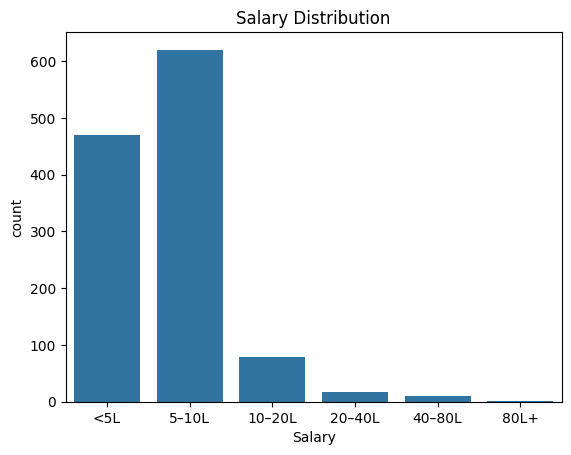

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
bins = [0, 500000, 1000000, 2000000, 4000000, 8000000, 20000000]
labels = ['<5L', '5–10L', '10–20L', '20–40L', '40–80L', '80L+']
df['Salary'] = pd.cut(df['avg_salary_rupees'], bins=bins, labels=labels)

sns.countplot(x='Salary', data=df, order=labels)
plt.title("Salary Distribution")
plt.show()


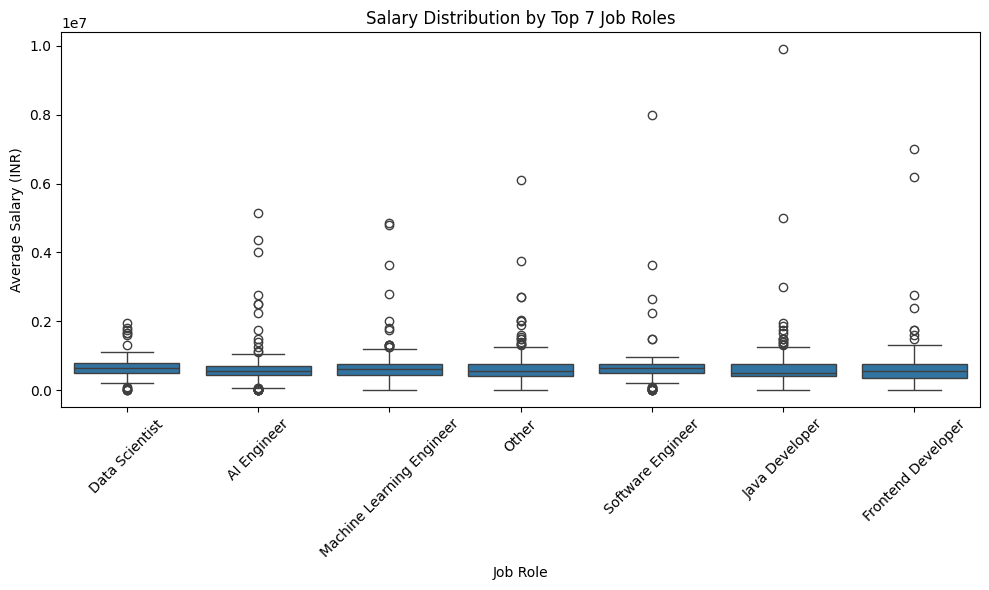

In [11]:
top_roles = df['Standardized Title'].value_counts().nlargest(7).index

# Filter DataFrame to include only those roles
top_df = df[df['Standardized Title'].isin(top_roles)]

# Plot boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Standardized Title', y='avg_salary_rupees', data=top_df)
plt.xticks(rotation=45)
plt.title("Salary Distribution by Top 7 Job Roles")
plt.ylabel("Average Salary (INR)")
plt.xlabel("Job Role")
plt.tight_layout()
plt.show()

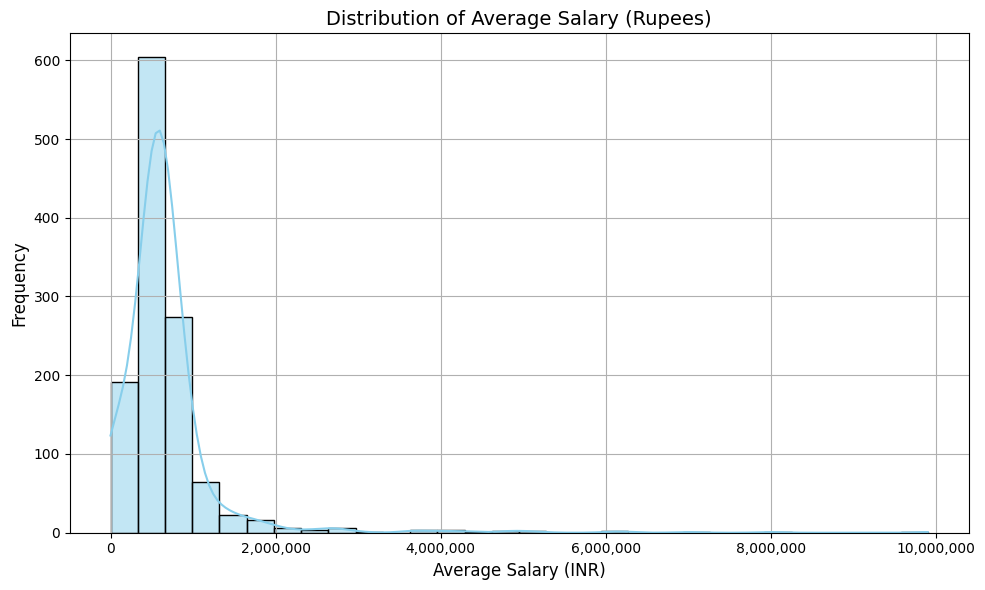

In [12]:
import matplotlib.ticker as mtick

plt.figure(figsize=(10, 6))
sns.histplot(df['avg_salary_rupees'], bins=30, kde=True, color='skyblue')

plt.title("Distribution of Average Salary (Rupees)", fontsize=14)
plt.xlabel("Average Salary (INR)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

formatter = mtick.FuncFormatter(lambda x, _: f"{int(x):,}")
plt.gca().xaxis.set_major_formatter(formatter)

plt.grid(True)
plt.tight_layout()
plt.show()


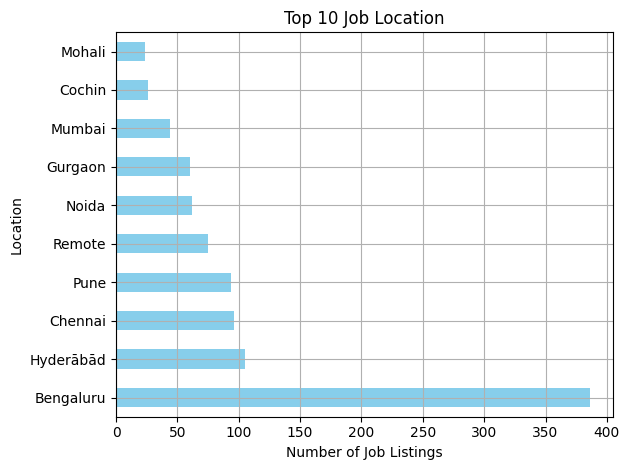

In [13]:

filtered_df = df[df['Location'].str.strip().str.lower() != 'india']


top_locs = filtered_df['Location'].value_counts().head(10)

top_locs.plot(kind='barh', color='skyblue')
plt.title("Top 10 Job Location")
plt.xlabel("Number of Job Listings")
plt.ylabel("Location")
plt.grid(True)
plt.tight_layout()
plt.show()


In [14]:
# df.to_csv("glassdoor_cleaned_new_final.csv", index=False)
